In [1]:
# Standard Python modules
import os, sys
import glob
import numpy as np
import pandas as pd
import xarray as xr

# plot styles/formatting
import seaborn as sns
import cmocean.cm as cmo
import cmocean

# matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec
from matplotlib.colorbar import Colorbar # different way to handle colorbar
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.projections import get_projection_class

sys.path.append('../modules')
from timeseries import select_months
import globalvars

In [2]:
path_to_data = globalvars.path_to_data
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [3]:
def create_df_plot(df):
    frac_lst = []
    AR_index_lst = []
    F_lst = np.arange(24, 168+24, 24)
    for j, F in enumerate(F_lst):
        idx = (df.F == F)
        tmp = df.loc[idx]
        idx = (df.IVT >= 95.) & (df.UV >= 95.) & (df.QPF >= 95.)
        tmp2 = tmp.loc[idx]
        frac_lst.append((len(tmp2) / len(tmp))*100)
        AR_index_lst.append(tmp2['AR_index'].mean())
    
    d = {'F': F_lst,
         'fraction': frac_lst,
         'AR_index': AR_index_lst
    }
    
    df_plot = pd.DataFrame(d)
    return df_plot

In [4]:
df = pd.read_csv(path_to_out+'landslide_box-whisker.csv')
df.loc[df["AR_index"] == 5.5, "AR_index"] = 5
df_ls = create_df_plot(df)
df_ls


,F,fraction,AR_index
0,24,73.0,3.260274
1,48,72.0,3.159722
2,72,66.0,3.143939
3,96,54.0,3.111111
4,120,43.0,3.046512
5,144,29.0,3.120690
6,168,19.0,2.763158


In [5]:
df = pd.read_csv(path_to_out+'non-landslide_box-whisker.csv')
df.loc[df["AR_index"] == 5.5, "AR_index"] = 5
df_nls = create_df_plot(df)
df_nls

,F,fraction,AR_index
0,24,32.280315,2.591880
1,48,29.263245,2.577793
2,72,25.196633,2.541073
3,96,21.570522,2.490403
4,120,16.908213,2.446531
5,144,13.680287,2.427346
6,168,8.187215,2.219224


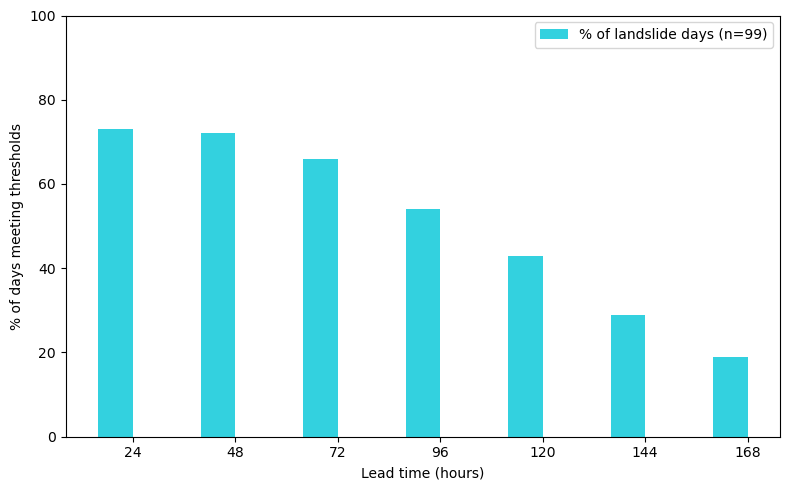

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assume df_ls and df_nls both have columns: "F" and "fraction"
F = df_ls["F"].values
ls_vals = df_ls["fraction"].values
nls_vals = df_nls["fraction"].values

# Set bar width (must be < spacing of F values)
bar_width = 8   # adjust as needed

# Figure and axes
fig, ax = plt.subplots(figsize=(8, 5))

# Offsets for grouped bars
x = F
x_ls  = x - bar_width/2
x_nls = x + bar_width/2

# Bars for landslide and non-landslide days
ax.bar(x_ls, ls_vals, width=bar_width, alpha=0.8,
       label="% of landslide days (n=99)",
       color="#00c6d7")

# ax.bar(x_nls, nls_vals, width=bar_width, alpha=0.8,
#        label="% of non-landslide days (n=7248)",
#        color="tab:blue")

# X-axis ticks at the center positions
ax.set_xticks(F)
ax.set_xlabel("Lead time (hours)")
ax.set_ylabel("% of days meeting thresholds")
ax.set_ylim(0, 100)
ax.legend()

## ---- Second y-axis for AR index values ------------------------------------------
# ax2 = ax1.twinx()

# ax2.plot(df["F"], df["AR_index"],
#          marker="o",
#          linewidth=2.0,
#          label="Mean AR Hazard Index",
#          color="black")

# ax2.set_ylabel("Mean AR Hazard Index", color="black")
# ax2.set_ylim(0, 5)

plt.tight_layout()
plt.show()

fname = '../figs/AGU_summary'
fmt = 'png'
fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi, transparent=True)

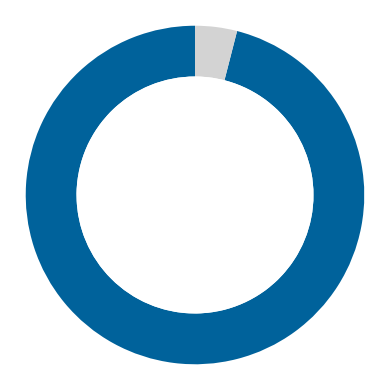

In [6]:
import matplotlib.pyplot as plt

# Values
sizes = [96, 4]
colors = ["#00629B", "lightgray"]  # blue + grey

fig, ax = plt.subplots(figsize=(4, 4))

# Pie chart
wedges, _ = ax.pie(
    sizes,
    colors=colors,
    startangle=90,
    wedgeprops=dict(width=0.3),  # width < 1.0 creates the donut,
)

# Add center circle for donut effect (optional, for more control)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')  # Equal aspect ratio keeps it circular
plt.tight_layout()
plt.show()

fname = '../figs/AGU_donut'
fmt = 'png'
fig.savefig('%s.%s' %(fname, fmt), bbox_inches='tight', dpi=fig.dpi, transparent=True)

